In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from larcv import larcv
%matplotlib inline

In [19]:
filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5.pkl'
df_2d = pd.read_pickle(filename)

In [20]:
df_3d.head()

,pot,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,...,lep_costheta,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,831.0,363.0,1423.0,545.0,1.0,1.0,0.005957,0.988524,...,0.803646,505.436119,17.3315,791.870105,405.770966,0.491926,-9999.000000,-9999.000000,-9999.0,-9999.0
1,1.830000e+14,-9999.0,535.0,176.0,963.0,1283.0,1.0,1.0,0.002177,0.982251,...,0.769864,1278.085149,0.0000,1952.514509,689.451343,0.760534,-9999.000000,-9999.000000,-9999.0,-9999.0
2,1.990000e+16,-9999.0,1223.0,222.0,1335.0,3290.0,0.0,0.0,0.998984,0.000665,...,0.811294,2907.087406,0.0000,3990.002371,937.749214,0.480438,-9999.000000,-9999.000000,-9999.0,-9999.0
3,1.990000e+16,-9999.0,1255.0,810.0,536.0,2439.0,0.0,0.0,0.999033,0.000674,...,0.778066,2018.981809,0.0000,2767.462610,787.092147,0.689583,183.316409,-0.792968,-9999.0,-9999.0
4,1.830000e+14,-9999.0,362.0,108.0,1154.0,772.0,1.0,1.0,0.014256,0.974537,...,0.989939,1060.951449,0.0000,1370.499906,452.336364,-0.768907,-9999.000000,-9999.000000,-9999.0,-9999.0


In [21]:
df_2d.head()

,pot,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,...,lep_costheta,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,-9999.0,-9999.0,-9999.0,8731.0,1.0,1.0,0.004591,0.988490,...,0.650287,286.194857,290.160436,2952.847233,985.064166,0.830034,-9999.0,-9999.0,-9999.0,-9999.0
1,1.990000e+16,-9999.0,-9999.0,-9999.0,-9999.0,5956.0,0.0,0.0,0.999393,0.000499,...,0.898477,742.207281,46.333583,3051.898081,659.521662,0.347313,-9999.0,-9999.0,-9999.0,-9999.0
2,1.990000e+16,-9999.0,-9999.0,-9999.0,-9999.0,7519.0,0.0,0.0,0.987032,0.005944,...,0.815207,553.806667,0.000000,1932.101359,421.015546,0.611066,-9999.0,-9999.0,-9999.0,-9999.0
3,1.830000e+14,-9999.0,-9999.0,-9999.0,-9999.0,874.0,1.0,0.0,0.333333,0.333333,...,0.954830,139.284296,0.000000,554.951851,296.006360,0.517914,-9999.0,-9999.0,-9999.0,-9999.0
4,5.190000e+14,-9999.0,-9999.0,-9999.0,-9999.0,210.0,2.0,2.0,0.051884,0.055841,...,-9999.000000,-9999.000000,0.000000,297.579062,442.820449,0.678349,-9999.0,-9999.0,-9999.0,-9999.0


In [22]:
accuracy_3d = np.mean(df_3d['true_neutrinoid'] == df_3d['pred_neutrinoid'])
accuracy_2d = np.mean(df_2d['true_neutrinoid'] == df_2d['pred_neutrinoid'])
print ('NeutrinoID: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_prot'] == df_3d['pred_prot'])
accuracy_2d = np.mean(df_2d['true_prot'] == df_2d['pred_prot'])
print ('N protons: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_cpi'] == df_3d['pred_cpi'])
accuracy_2d = np.mean(df_2d['true_cpi'] == df_2d['pred_cpi'])
print ('Cpi: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

accuracy_3d = np.mean(df_3d['true_npi'] == df_3d['pred_npi'])
accuracy_2d = np.mean(df_2d['true_npi'] == df_2d['pred_npi'])
print ('Npi: 3D accuracy:', accuracy_3d, ' - 2D accuracy:', accuracy_2d)

NeutrinoID: 3D accuracy: 0.8796879277306323  - 2D accuracy: 0.818317909635275
N protons: 3D accuracy: 0.7700520120448946  - 2D accuracy: 0.7101252041371802
Cpi: 3D accuracy: 0.8828360251847797  - 2D accuracy: 0.8347849755035384
Npi: 3D accuracy: 0.9414180125923898  - 2D accuracy: 0.9055525313010343


In [23]:
def pot_scale_factor(this_pot, target = 1e20):
    
    return target / this_pot

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# ROC Curve

In [24]:
from sklearn.metrics import roc_curve, auc

def get_rocs(df, name='true_neutrinoid', classes=['nue', 'numu', 'nc']):
    
    fpr = {}
    tpr = {}
    roc_th = {}

    y_true = np.array(df[name])

    for i, this_class in enumerate(classes):    
        y_score = np.array(df['pred_'+this_class])
        fpr[this_class], tpr[this_class], roc_th[this_class] = roc_curve(y_true, y_score, pos_label=i)

    for i,j in fpr.items():
        fpr[i] = 1 - fpr[i]
        
    return fpr, tpr, roc_th

In [25]:
# name='true_neutrinoid'
# classes=['nue', 'numu', 'nc']
# labels=['$\\nu_e$', '$\\nu_\\mu$', '$NC$']

# name='true_prot'
# classes=['prot0', 'prot1', 'prot2']
# labels=['$N_p = 0$', '$N_p = 1$', '$N_p > 1$']

# name='true_cpi'
# classes=['cpino', 'cpiyes']
# labels=['$N_{\\pi^{\\pm}} = 0$', '$N_{\\pi^{\\pm}} > 0$']

name='true_npi'
classes=['npino', 'npiyes']
labels=['$N_{\\pi^{0}} = 0$', '$N_{\\pi^{0}} > 0$']

fpr_3d, tpr_3d, roc_th_3d = get_rocs(df_3d, name, classes)
fpr_2d, tpr_2d, roc_th_2d = get_rocs(df_2d, name, classes)

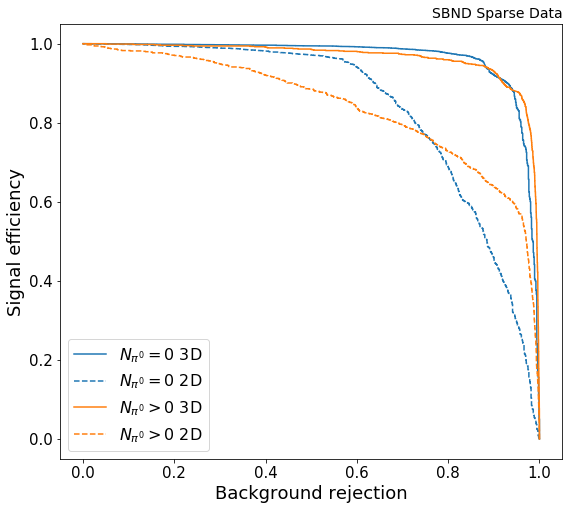

In [26]:
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.figure(1)

for i, this_class in enumerate(classes):
    plt.plot(fpr_3d[this_class], tpr_3d[this_class], label=labels[i] +' 3D', color=colors[i])

    plt.plot(fpr_2d[this_class], tpr_2d[this_class], label=labels[i] +' 2D', color=colors[i], linestyle='--')


plt.legend(fontsize=16, loc='best')
plt.ylabel('Signal efficiency',fontsize=18)
plt.xlabel('Background rejection',fontsize=18)
plt.title('SBND Sparse Data', loc='right', fontsize=14)
plt.tick_params(labelsize=15)

plt.savefig('roc_'+name+'.pdf')
plt.show()

# Confusion Matrix

In [27]:
def get_confusion_matrix_values(df, name='neutrinoid', loop_max=3):
    '''
    Calculates the confusion matrix.
    Returns the bins along x and y (just 0, 1, 2, ...)
    the number of events in each bin (e),
    and the fraction w.r.t. true (recall) (w).
    '''

    x = []
    y = []
    e = []
    w = []

    for sig_t in range(0, loop_max):
        for sig_f in range(0, loop_max):

            true = df.query('true_'+name+' == ' + str(sig_t))
            n = true.query('pred_'+name+' == ' + str(sig_f))
            n = len(n)
        
            x.append(sig_t)
            y.append(sig_f)
            e.append(n)
            w.append(float(n) / len(true))

    return x, y, e, w

def add_text_on_bins_perc(ax, xbins, ybins, hist):
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.5,ybins[i]+0.5, '{0:0.3f}'.format(hist[i,j]), 
                    color="black", ha="center", va="center", fontweight="bold", fontsize=16)
            
def add_text_on_bins(ax, xbins, ybins, hist):
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.5,ybins[i]+0.5, '{0:0.0f}'.format(hist[i,j]), 
                    color="black", ha="center", va="center", fontweight="bold", fontsize=16)
    

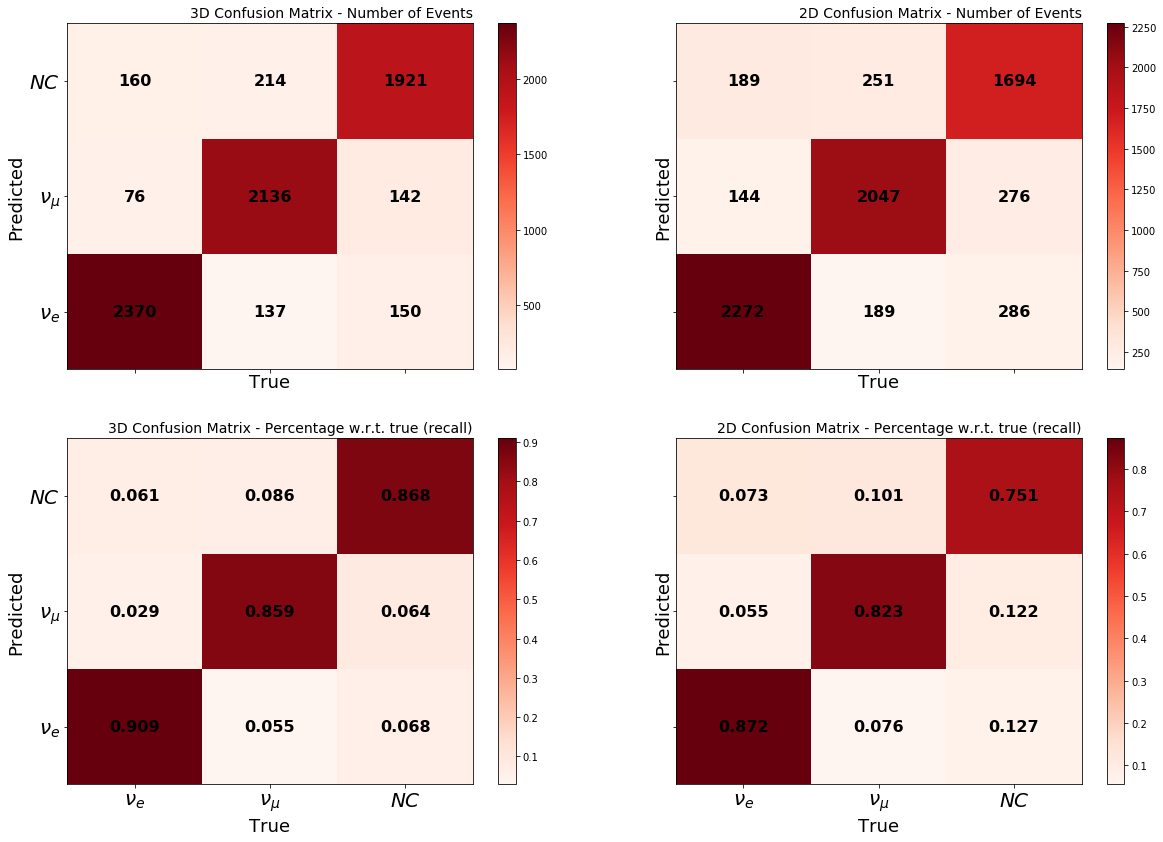

In [28]:
name = 'neutrinoid'
labels = ('$\\nu_e$', '$\\nu_\\mu$', '$NC$')
loop_max = 3

# name = 'prot'
# labels = ('$N_p = 0$', '$N_p = 1$', '$N_p > 1$')
# loop_max = 3

# name = 'cpi'
# labels = ('$N_{\\pi^{\\pm}} = 0$', '$N_{\\pi^{\\pm}} > 0$')
# loop_max = 2

# name = 'npi'
# labels = ('$N_{\\pi^{0}} = 0$', '$N_{\\pi^{0}} > 0$')
# loop_max = 2

x_3d, y_3d, e_3d, w_3d = get_confusion_matrix_values(df_3d, name, loop_max)
x_2d, y_2d, e_2d, w_2d = get_confusion_matrix_values(df_2d, name, loop_max)


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=True)

hist, xbins, ybins, im = ax[0][0].hist2d(y_3d, x_3d, bins=range(loop_max+1), weights=e_3d, cmap=plt.cm.Reds)
add_text_on_bins(ax[0][0], xbins, ybins, hist)
plt.colorbar(im, ax=ax[0][0])

hist, xbins, ybins, im = ax[0][1].hist2d(y_2d, x_2d, bins=range(loop_max+1), weights=e_2d, cmap=plt.cm.Reds)
add_text_on_bins(ax[0][1], xbins, ybins, hist)  
plt.colorbar(im, ax=ax[0][1])

hist, xbins, ybins, im = ax[1][0].hist2d(y_3d, x_3d, bins=range(loop_max+1), weights=w_3d, cmap=plt.cm.Reds)
add_text_on_bins_perc(ax[1][0], xbins, ybins, hist)
plt.colorbar(im, ax=ax[1][0])

hist, xbins, ybins, im = ax[1][1].hist2d(y_2d, x_2d, bins=range(loop_max+1), weights=w_2d, cmap=plt.cm.Reds)
add_text_on_bins_perc(ax[1][1], xbins, ybins, hist)  
plt.colorbar(im, ax=ax[1][1])

plt.xticks(np.arange(loop_max)+0.5, labels, fontsize=18)
plt.yticks(np.arange(loop_max)+0.5, labels, fontsize=18)

for a in ax:
    for b in a:
        b.tick_params(labelsize=20)
        b.set_xlabel('True',fontsize=18)
        b.set_ylabel('Predicted',fontsize=18)

        b.tick_params(labelsize=20)
        b.set_xlabel('True',fontsize=18)
        b.set_ylabel('Predicted',fontsize=18)

ax[0][0].set_title('3D Confusion Matrix - Number of Events', loc='right', fontsize=14)
ax[0][1].set_title('2D Confusion Matrix - Number of Events', loc='right', fontsize=14)

ax[1][0].set_title('3D Confusion Matrix - Percentage w.r.t. true (recall)', loc='right', fontsize=14)
ax[1][1].set_title('2D Confusion Matrix - Percentage w.r.t. true (recall)', loc='right', fontsize=14)

plt.savefig('confusion_matrix_'+name+'.pdf')
plt.show()

# Distributions

In [29]:
import scipy.stats
    
def efficiency(num, den, num_w=None, den_w=None, n_bins=10, limits=None, conf_level=None):
    '''
    Calculates the efficiency given two populations: one containig 
    the totatility of the events, and one containing only events 
    that pass the selection.
    It uses a frequentist approach to evaluate the uncertainty.
    Other methods are to be implemented.
    
     Arguments:
        num {tuple} -- The totality of the events
        den {tuple} -- The events that pass the selection
        num_w {tuple} -- Optional, the weight for every event
        den_w {tuple} -- Optional, the weight for every selected event
        n_bins {int} -- Optional, the number of bins
        range {tuple} -- Optional, the lower and upper range of the bins 
        conf_level {float} -- Optional, the confidence level to be used
        
    Outputs:
        eff {tuple} -- The efficiency per bin
        unc_low {tuple} -- The lower uncertainty per bin
        unc_up {tuple} -- The upper uncertainty per bin
        bins {tuple} -- The bin edges
        bins_mid {tuple} -- The mid points of the bins
        x_bar {tuple} -- The uncertainty along the x axis
    '''
    
    if num_w is None:
        num_w = [1.] * len(num)
        
    if den_w is None:
        den_w = [1.] * len(den)
        
    if conf_level is None:
        conf_level = 0.682689492137
        
    if limits is None:
        x_min=0
        x_max=10
    else:
        x_min=limits[0]
        x_max=limits[1]

    num = np.asarray(num, dtype=np.float32)
    num_w = np.asarray(num_w, dtype=np.float32)
    den = np.asarray(den, dtype=np.float32)
    den_w = np.asarray(den_w, dtype=np.float32)

    bins = np.linspace(x_min, x_max, n_bins)

    num_h, _    = np.histogram(num, bins=bins)
    num_w_h, _  = np.histogram(num, weights=num_w, bins=bins)
    num_w2_h, _ = np.histogram(num, weights=num_w**2, bins=bins)

    den_h, _    = np.histogram(den, bins=bins)
    den_w_h, _  = np.histogram(den, weights=den_w, bins=bins)
    den_w2_h, _ = np.histogram(den, weights=den_w**2, bins=bins)

    eff = num_w_h / den_w_h

    variance = (num_w2_h * (1. - 2 * eff) + den_w2_h * eff *eff ) / ( den_w_h * den_w_h)
    sigma = np.sqrt(variance)
    prob = 0.5 * (1. - conf_level)
    delta = - scipy.stats.norm.ppf(prob) * sigma

    unc_up = []
    unc_low = []

    for eff_i, delta_i in zip(eff, delta):
        if eff_i - delta_i < 0:
            unc_low.append(eff_i)
        else:
            unc_low.append(delta_i)
            
        if eff_i + delta_i > 1:
            unc_up.append(1. - eff_i)
        else:
            unc_up.append(delta_i)
            
    print('--------', type(bins), len(bins), bins[0])
    bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
    x_bar = 0.5*(bins[-1]-bins[0])/len(bins)
    
    return eff, unc_low, unc_up, bins, bins_mid, x_bar



# num = nue_sel_df_3d[variable].values
# num_w = [1] * len(nue_sel_df_3d) #[pot_scale_3d]*len(nue_df_3d)
# den = nue_df_3d[variable].values
# den_w = [1] * len(nue_df_3d) #[pot_scale_3d]*len(nue_sel_df_3d)

# x_range = [0, 2000]
# eff, unc_low, unc_up, bins, bins_mid, unc_x = efficiency(num, den, num_w, den_w, n_bins=10, range=x_range)

# fig = plt.figure(figsize=(9,8),facecolor='w')
# # bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

# # plt.step(bins_mid, eff, where='mid', label='pre (default)')
# # x_bar = 0.5*(bins[-1]-bins[0])/len(bins)
# plt.errorbar(bins_mid, eff, yerr=[unc_low, unc_up], xerr=x_bar, label='both limits (default)', fmt='o', color='#d62728')

In [30]:
name = 'neutrinoid'
# name = 'prot'
# name = 'cpi'
# name = 'npi'

# signal = 0 # nue, prot0, cpi = 0, npi = 0
signal = 1 # numu, prot1, cpi > 0, npi > 0
# signal = 2 # nc, prot2

if name == 'neutrinoid':
    if signal == 0: signal_txt = '$\\nu_{e}$'
    if signal == 1: signal_txt = '$\\nu_{\\mu}$'
    if signal == 2: signal_txt = '$NC$'

if name == 'prot':
    if signal == 0: signal_txt = '$N_{p} = 0$'
    if signal == 1: signal_txt = '$N_{p} = 1$'
    if signal == 2: signal_txt = '$N_{p} > 1$'
        
if name == 'cpi':
    if signal == 0: signal_txt = '$N_{\\pi^{\\pm}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{\\pm}} > 0$'

if name == 'npi':
    if signal == 0: signal_txt = '$N_{\\pi^{0}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{0}} > 0$'


nue_df_3d = df_3d.query('true_'+name+' == ' + str(signal))
nue_sel_df_3d = df_3d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == ' + str(signal))
nue_sel_df_2d = df_2d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

Overall efficiency - 3D: 0.8605962933118453
Overall efficiency - 2D: 0.8247381144238517
-------- <class 'numpy.ndarray'> 20 -1.0
-------- <class 'numpy.ndarray'> 20 -1.0


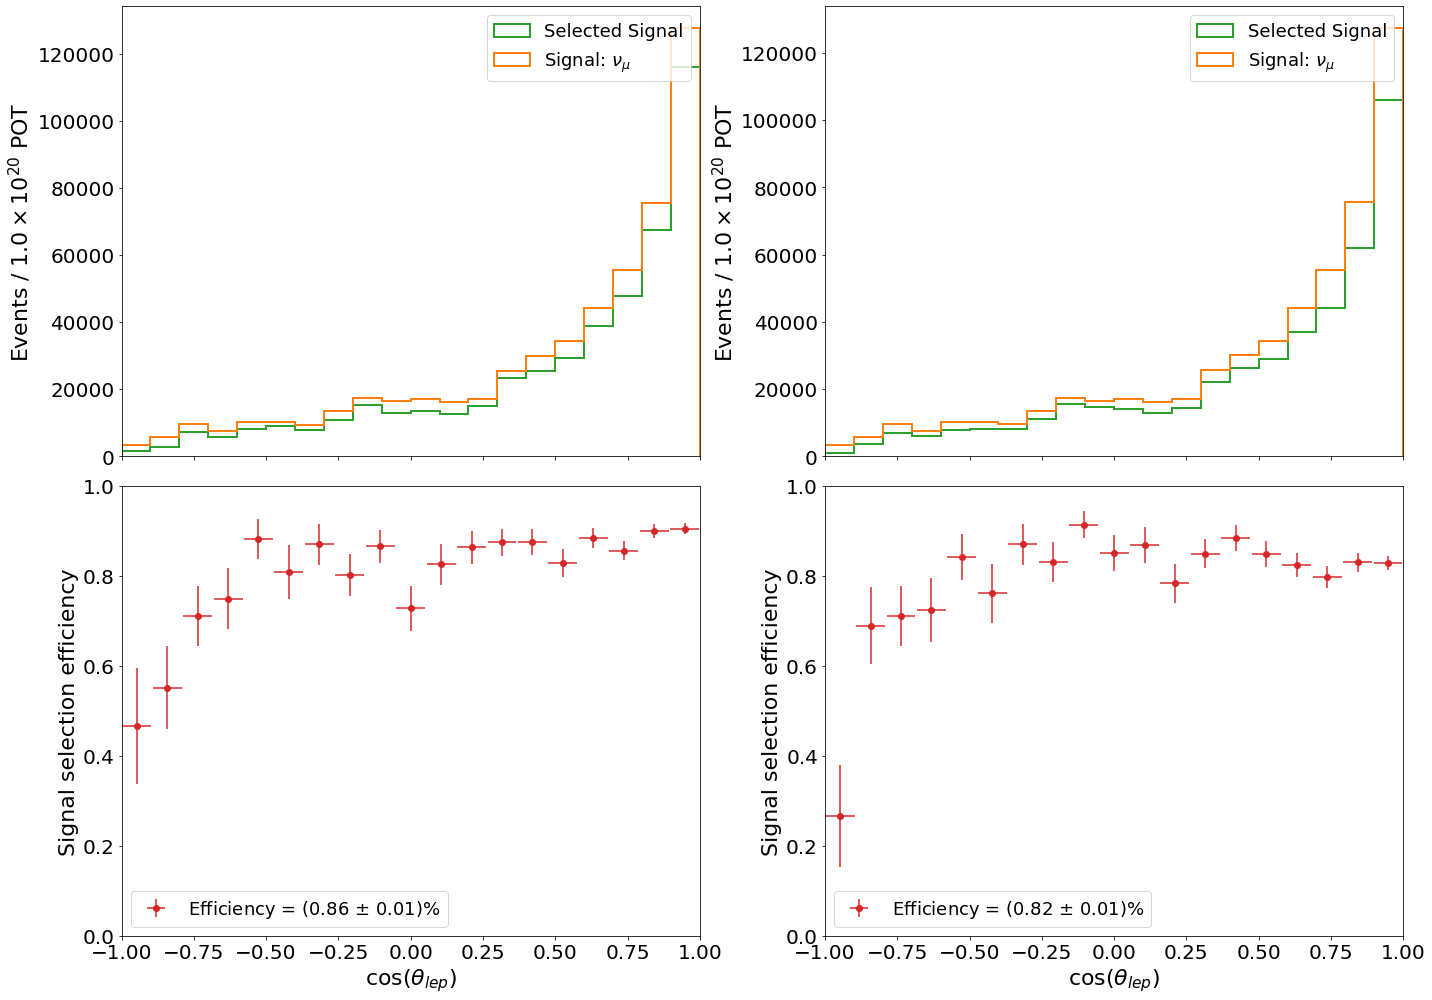

In [33]:
variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 2500]

variable = 'lep_costheta'
xlabel='cos($\\theta_{lep}$)'
x_range = [-1, 1]

# variable = 'lead_prot_p'
# xlabel='Leading Proton Momentum [MeV]'
# x_range = [0, 2000]

# variable = 'lead_prot_costheta'
# xlabel='Leading Proton cos($\\theta_p$)'
# x_range = [-1, 1]

# variable = 'lead_cpi_p'
# xlabel='Leading $\\pi^{\\pm}$ Momentum [MeV]'
# x_range = [0, 1500]

# variable = 'lead_cpi_costheta'
# xlabel='Leading Proton $\\pi^{\\pm}$ cos($\\theta_{\\pi^{\\pm}}$)'
# x_range = [-1, 1]

# variable = 'lead_npi_p'
# xlabel='Leading $\\pi^{0}$ Momentum [MeV]'
# x_range = [0, 1]

# variable = 'lead_npi_costheta'
# xlabel='Leading Proton $\\pi^{0}$ cos($\\theta_{\\pi^{0}}$)'
# x_range = [-1, 1]

print ('Overall efficiency - 3D:', float(len(nue_sel_df_3d)) / len(nue_df_3d))
print ('Overall efficiency - 2D:', float(len(nue_sel_df_2d)) / len(nue_df_2d))

pot_scale_3d = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_2d = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))           

nue_df_3d = nue_df_3d.query(variable + ' > -9999')
nue_sel_df_3d = nue_sel_df_3d.query(variable + ' > -9999')
nue_df_2d = nue_df_2d.query(variable + ' > -9999')
nue_sel_df_2d = nue_sel_df_2d.query(variable + ' > -9999')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)


# 3D - left

bins, edges, _ = ax[0][0].hist([nue_df_3d[variable].values,nue_sel_df_3d[variable].values], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)],
                               bins=20,
                               range=x_range)

eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=nue_sel_df_3d[variable].values, 
                                                         den=nue_df_3d[variable].values, 
                                                         num_w=[pot_scale_3d]*len(nue_sel_df_3d), 
                                                         den_w=[pot_scale_3d]*len(nue_df_3d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_3d = float(len(nue_sel_df_3d)) / len(nue_df_3d)
tot_err_eff_3d = np.sqrt(float(len(nue_sel_df_3d))*(1-float(len(nue_sel_df_3d))/len(nue_df_3d)))/len(nue_df_3d)

ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



# 2D - right

bins, edges, _ = ax[0][1].hist([nue_df_2d[variable],nue_sel_df_2d[variable]], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_2d]*len(nue_df_2d), [pot_scale_2d]*len(nue_sel_df_2d)],
                               bins=20,
                               range=x_range)

eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=nue_sel_df_2d[variable].values, 
                                                         den=nue_df_2d[variable].values, 
                                                         num_w=[pot_scale_2d]*len(nue_sel_df_2d), 
                                                         den_w=[pot_scale_2d]*len(nue_df_2d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_2d = float(len(nue_sel_df_2d)) / len(nue_df_2d)
tot_err_eff_2d = np.sqrt(float(len(nue_sel_df_2d))*(1-float(len(nue_sel_df_2d))/len(nue_df_2d)))/len(nue_df_2d)

ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



fsize = 22

# Left settings

ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][0].set_xlabel(xlabel, fontsize=fsize)
ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][0].tick_params(labelsize=20)
ax[1][0].tick_params(labelsize=20)

ax[0][0].legend(fontsize=18, loc='best')
ax[1][0].legend(fontsize=18, loc=3)
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlim(x_range[0], x_range[1])


# Right settings

ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][1].set_xlabel(xlabel, fontsize=fsize)
ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][1].tick_params(labelsize=20)
ax[1][1].tick_params(labelsize=20)

ax[0][1].legend(fontsize=18, loc='best')
ax[1][1].legend(fontsize=18, loc=3)
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlim(x_range[0], x_range[1])


fig.tight_layout()

plt.savefig('selected_events_efficiency_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()


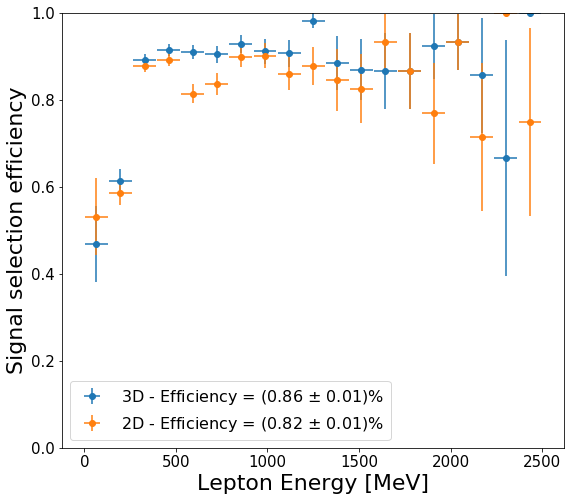

In [32]:
fig = plt.figure(figsize=(9,8),facecolor='w')

plt.errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  label='3D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

plt.errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  label='2D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))

plt.xlabel(xlabel, fontsize=fsize)
plt.ylabel('Signal selection efficiency', fontsize=fsize)

plt.legend(fontsize=16, loc='best')
# plt.title('SBND Sparse Data', loc='right', fontsize=14)
plt.tick_params(labelsize=15)
plt.ylim(0,1)

plt.savefig('selected_events_efficiency_both_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()

In [17]:
nue_df_3d = df_3d.query('true_neutrinoid == 0')
nue_sel_df_3d = df_3d.query('true_neutrinoid == 0 and pred_nue > 0.5')

pot_scale = pot_scale_factor(this_pot=np.sum(nue_df['pot']))



fig = plt.figure(figsize=(12,8),facecolor='w') #plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,12))
    
plt.hist(nue_df_3d['lep_e'], bins=40, color=colors[0], alpha=0.5, weights=[pot_scale]*len(nue_df_3d), label='All $\\nu_e$')
plt.hist(nue_sel_df_3d['lep_e'], bins=40, color=colors[0], weights=[pot_scale]*len(nue_sel_df_3d), label='Selected $\\nu_e$')
# plt.hist(df['costheta'], 80, label='-')

# ax.legend(numpoints=1, loc='upper left')

plt.ylabel('Events / $1 \\times 10^{20}$ POT',fontsize=23)
plt.xlabel('Elecron Energy [MeV]',fontsize=23)
plt.tick_params(labelsize=20)
# plt.title('Neutrino ID Classification ($\\nu_e$, $\\nu_\\mu$, $NC$)', loc='right', fontsize=18)

leg=plt.legend(fontsize=16,loc=0)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')

plt.show()

NameError: name 'nue_df' is not defined

# OLD

In [ ]:
def to_dataframe(filename):
    
    df = pd.DataFrame(columns=['pot', 'nu_e',
                               'true_neutrinoid', 'pred_neutrinoid', 'pred_nue', 'pred_numu', 'pred_nc',
                               'true_prot', 'pred_prot', 'pred_prot0', 'pred_prot1', 'pred_prot2',
                               'true_cpi', 'pred_cpi', 'pred_cpino', 'pred_cpiyes',
                               'true_npi', 'pred_npi', 'pred_npino', 'pred_npiyes',
                               'lep_pdg', 'lep_e', 'lep_costheta', 'lep_dep_e',
                               'lead_prot_p', 'lead_prot_costheta',
                               'lead_cpi_p', 'lead_cpi_costheta',
                               'lead_npi_p', 'lead_npi_costheta'])
    
    io = larcv.IOManager()
    io.add_in_file(filename)
    io.initialize()

    for i in range(io.get_n_entries()):
    
        if i % 1000 == 0:
            print("On entry ", i, " of ", io.get_n_entries())
        
        io.read_entry(i)
        
        #
        # Save kinematics
        #
        
        pot = -9999
        nu_e = -9999
        lep_pdg = -9999
        lep_e = -9999
        lep_costheta = -9999
        lep_dep_e = -9999
        lead_prot_p = -9999
        lead_prot_costheta = -9999
        lead_cpi_p = -9999
        lead_cpi_costheta = -9999
        lead_npi_p = -9999
        lead_npi_costheta = -9999
        
        event_cluster3d = larcv.EventSparseCluster3D.to_sparse_cluster(io.get_data("cluster3d", "sbndsegmerged"))
        clusters = event_cluster3d.as_vector().front().as_vector()
        
        mc_truth = larcv.EventParticle.to_particle(io.get_data("particle", "sbndsegmerged"))
        
        all_protons_p = []
        all_protons_costheta = []
        
        all_cpis_p = []
        all_cpis_costheta = []
        
        all_npis_p = []
        all_npis_costheta = []
            
        for j, mct in enumerate(mc_truth.as_vector()):
            
            cluster = clusters[j]
            
            # Lepton
            if mct.pdg_code() in finalstate_leptons:
                lep_pdg = mct.pdg_code()
                lep_e = mct.energy_init()
                try:
                    lep_costheta = mct.pz() / mct.p()
                except:
                    pass
                
                lep_dep_e = 0
                for voxel in cluster.as_vector():
                    lep_dep_e += voxel.value()
                    
            # Proton
            if mct.pdg_code() in protons:
                all_protons_p.append(mct.p())
                try:
                    all_protons_costheta.append(mct.pz() / mct.p())
                except:
                    pass
                
            # C pi
            if mct.pdg_code() in cpis:
                all_cpis_p.append(mct.p())
                try:
                    all_cpis_costheta.append(mct.pz() / mct.p())
                except:
                    pass
                
            # N pi
            if mct.pdg_code() == 111: print('++++++++++++++++++++')
            if mct.pdg_code() in npis:
                all_npis_p.append(mct.p())
                try:
                    all_npis_costheta.append(mct.pz() / mct.p())
                except:
                    pass
                
        # Leading proton
        try:
            index_leading_prot = all_protons_p.index(max(all_protons_p))
            lead_prot_p = all_protons_p[index_leading_prot]
            lead_prot_costheta = all_protons_costheta[index_leading_prot]
        except:
            pass
        
        # Leading cpi
        try:
            index_leading_cpi = all_cpis_p.index(max(all_cpis_p))
            lead_cpi_p = all_cpis_p[index_leading_cpi]
            lead_cpi_costheta = all_cpis_costheta[index_leading_cpi]
        except:
            pass
        
        # Leading npi
        try:
            index_leading_npi = all_npis_p.index(max(all_npis_p))
            lead_npi_p = all_npis_p[index_leading_npi]
            lead_npi_costheta = all_npis_costheta[index_leading_npi]
        except:
            pass
         
            
        #
        # Save predicted info
        #
    
        neut_id = larcv.EventTensor1D.to_tensor(io.get_data("tensor1d", "label_neut"))
        neut_id = larcv.as_ndarray(neut_id.as_vector().front())
        pred_neutrinoid =  np.argmax(neut_id)
        
        prot = larcv.EventTensor1D.to_tensor(io.get_data("tensor1d", "label_prot"))
        prot = larcv.as_ndarray(prot.as_vector().front())
        pred_prot =  np.argmax(prot)
        
        cpi = larcv.EventTensor1D.to_tensor(io.get_data("tensor1d", "label_cpi"))
        cpi = larcv.as_ndarray(cpi.as_vector().front())
        pred_cpi =  np.argmax(cpi)
        
        npi = larcv.EventTensor1D.to_tensor(io.get_data("tensor1d", "label_npi"))
        npi = larcv.as_ndarray(npi.as_vector().front())
        pred_npi =  np.argmax(npi)
        
        
        #
        # Save true info
        #
    
        label_neut = larcv.EventParticle.to_particle(io.get_data("particle", "neutID"))
        label_neut = label_neut.as_vector().front().pdg_code()
        
        label_prot = larcv.EventParticle.to_particle(io.get_data("particle", "protID"))
        label_prot = label_prot.as_vector().front().pdg_code()
        
        label_cpi = larcv.EventParticle.to_particle(io.get_data("particle", "cpiID"))
        label_cpi = label_cpi.as_vector().front().pdg_code()
        
        label_npi = larcv.EventParticle.to_particle(io.get_data("particle", "npiID"))
        label_npi = label_npi.as_vector().front().pdg_code()

        
        # pot is per event, by truth information:
        if label_neut == 0:
            # nueCC
            pot = 1.99e16
        elif label_neut == 1:
            # numuCC
            pot = 1.83e14
        else:
            # NC
            pot = 5.19e14
        
        df.loc[i] = [pot, nu_e,
                     label_neut, pred_neutrinoid, neut_id[0], neut_id[1], neut_id[2],
                     label_prot, pred_prot, prot[0], prot[1], prot[2],
                     label_cpi, pred_cpi, cpi[0], cpi[1],
                     label_npi, pred_npi, npi[0], npi[1],
                     lep_pdg, lep_e, lep_costheta, lep_dep_e,
                     lead_prot_p, lead_prot_costheta,
                     lead_cpi_p, lead_cpi_costheta,
                     lead_npi_p, lead_npi_costheta]
        
    return df